<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DS-SF-42 | Class 8 | Regression - Addressing model fit

<br>
### _Predicting shots made per game by Kobe Bryant_

_Authors: Kiefer Katovich (SF) and Gus Ostow (SF)_

---

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression will cause issues that other datasets might not. In this exploration you will be diagnose issues with model fit using regression metrics, train/test split, and cross validation.


### Plan

Today I am going to flip the script: we are going to start the class with a hands-on partner activity to motivate the day's topic, then address the theory after.

1. Motivating the problem
3. Slides interlude
2. Addressing the problem

### Teams

<img src=https://i.imgur.com/JI6ydY5.png align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# <font color=blue>Part I</font> - Motifivating the problem


---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

#### Guiding questions

- How many columns are there? 
- Examine what the observations (rows) and columns represent.
- Why does this dataset _feel_ different than the datasets we've touched so far?
- What concerns do you have even before fitting your first model?

In [8]:
kobe.describe()

# data is unclear what it means, lots of 0s in the columns, hard to understand what the mean is, some categorical
# we don't know what we would predict


,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,7.358793,0.500642,0.001284,0.001284,0.000642,0.000642,0.001284,0.001284,0.000642,0.000642,...,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766,42.946727,780.486521
std,3.471180,0.500160,0.035817,0.035817,0.025335,0.025335,0.035817,0.035817,0.025335,0.025335,...,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402,26.048206,449.923227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,391.250000
50%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,780.500000
75%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,63.000000,1169.750000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941,105.000000,1559.000000


In [11]:
list(kobe.columns.values)

['SHOTS_MADE',
 'AWAY_GAME',
 'SEASON_OPPONENT:atl:1996-97',
 'SEASON_OPPONENT:atl:1997-98',
 'SEASON_OPPONENT:atl:1999-00',
 'SEASON_OPPONENT:atl:2000-01',
 'SEASON_OPPONENT:atl:2001-02',
 'SEASON_OPPONENT:atl:2002-03',
 'SEASON_OPPONENT:atl:2003-04',
 'SEASON_OPPONENT:atl:2004-05',
 'SEASON_OPPONENT:atl:2005-06',
 'SEASON_OPPONENT:atl:2006-07',
 'SEASON_OPPONENT:atl:2007-08',
 'SEASON_OPPONENT:atl:2008-09',
 'SEASON_OPPONENT:atl:2009-10',
 'SEASON_OPPONENT:atl:2010-11',
 'SEASON_OPPONENT:atl:2011-12',
 'SEASON_OPPONENT:atl:2012-13',
 'SEASON_OPPONENT:atl:2013-14',
 'SEASON_OPPONENT:atl:2014-15',
 'SEASON_OPPONENT:atl:2015-16',
 'SEASON_OPPONENT:bkn:2012-13',
 'SEASON_OPPONENT:bkn:2015-16',
 'SEASON_OPPONENT:bos:1996-97',
 'SEASON_OPPONENT:bos:1997-98',
 'SEASON_OPPONENT:bos:1999-00',
 'SEASON_OPPONENT:bos:2001-02',
 'SEASON_OPPONENT:bos:2002-03',
 'SEASON_OPPONENT:bos:2003-04',
 'SEASON_OPPONENT:bos:2004-05',
 'SEASON_OPPONENT:bos:2005-06',
 'SEASON_OPPONENT:bos:2006-07',
 'SEASON_OP

In [20]:
kobe[kobe.filter(like='ACTION_TYPE').columns].describe()

,ACTION_TYPE:alley_oop_dunk_shot,ACTION_TYPE:alley_oop_layup_shot,ACTION_TYPE:cutting_finger_roll_layup_shot,ACTION_TYPE:cutting_layup_shot,ACTION_TYPE:driving_bank_shot,ACTION_TYPE:driving_dunk_shot,ACTION_TYPE:driving_finger_roll_layup_shot,ACTION_TYPE:driving_finger_roll_shot,ACTION_TYPE:driving_floating_bank_jump_shot,ACTION_TYPE:driving_floating_jump_shot,...,ACTION_TYPE:slam_dunk_shot,ACTION_TYPE:step_back_jump_shot,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,0.003535,0.002391,0.000046,0.000223,0.000165,0.010127,0.002246,0.002514,0.000071,0.000161,...,0.015188,0.003643,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766
std,0.013362,0.011149,0.001810,0.003617,0.002930,0.028387,0.011865,0.012849,0.002815,0.003417,...,0.036864,0.015250,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632
max,0.125000,0.153846,0.071429,0.066667,0.062500,0.500000,0.111111,0.142857,0.111111,0.105263,...,0.333333,0.166667,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941


In [71]:
#CLASS ANSWER
kobe.shape

#Analyze, lots of columns, use to more observations than features

(1558, 645)

In [73]:
# Print column names
for col in kobe.columns:
    print col

SHOTS_MADE
AWAY_GAME
SEASON_OPPONENT:atl:1996-97
SEASON_OPPONENT:atl:1997-98
SEASON_OPPONENT:atl:1999-00
SEASON_OPPONENT:atl:2000-01
SEASON_OPPONENT:atl:2001-02
SEASON_OPPONENT:atl:2002-03
SEASON_OPPONENT:atl:2003-04
SEASON_OPPONENT:atl:2004-05
SEASON_OPPONENT:atl:2005-06
SEASON_OPPONENT:atl:2006-07
SEASON_OPPONENT:atl:2007-08
SEASON_OPPONENT:atl:2008-09
SEASON_OPPONENT:atl:2009-10
SEASON_OPPONENT:atl:2010-11
SEASON_OPPONENT:atl:2011-12
SEASON_OPPONENT:atl:2012-13
SEASON_OPPONENT:atl:2013-14
SEASON_OPPONENT:atl:2014-15
SEASON_OPPONENT:atl:2015-16
SEASON_OPPONENT:bkn:2012-13
SEASON_OPPONENT:bkn:2015-16
SEASON_OPPONENT:bos:1996-97
SEASON_OPPONENT:bos:1997-98
SEASON_OPPONENT:bos:1999-00
SEASON_OPPONENT:bos:2001-02
SEASON_OPPONENT:bos:2002-03
SEASON_OPPONENT:bos:2003-04
SEASON_OPPONENT:bos:2004-05
SEASON_OPPONENT:bos:2005-06
SEASON_OPPONENT:bos:2006-07
SEASON_OPPONENT:bos:2007-08
SEASON_OPPONENT:bos:2008-09
SEASON_OPPONENT:bos:2009-10
SEASON_OPPONENT:bos:2010-11
SEASON_OPPONENT:bos:2011-12

In [75]:
kobe['AWAY_GAME'].unique()

array([0, 1], dtype=int64)

In [76]:
#ANSWER LOOK AT FIRST ROW

kobe.iloc[0:1]

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [81]:
# Will filter season opponent as boolean

column_mask = kobe.filter(like='SEASON_OPPONENT').loc[0,].astype(bool)

In [82]:
# Within the row, find the season tha tis equal to 1
kobe.filter(like='SEASON_OPPONENT').loc[0, column_mask]

SEASON_OPPONENT:min:1996-97    1.0
Name: 0, dtype: float64

In [83]:
column_mask = kobe.filter(like='SEASON_OPPONENT').loc[0,] > 0

In [85]:
# Best way to choose an x on all columns except wins
X = kobe.drop('SHOTS_MADE', axis=1)
y = kobe['SHOTS_MADE']

In [88]:
# Sanity check, tells you x is the same length as y because they need to be paired together
X.shape[0] == y.shape[0]

# will throw a big error: assert X.shape[0] == y.shape[0]

True

In [87]:
y.shape

(1558L,)

In [141]:
# keyword argument is the test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [92]:
print X_train.shape
print y_train.shape

(1168, 644)
(1168L,)


---

### 3.  Prepare the dataset for training AND validation

- Make predictor matrix `X` and target variable `y`
- Split your data into a validation set using `train_test_split`

In [35]:
kobe2 = kobe.loc[:, kobe.columns != 'SHOTS_MADE']

In [36]:
x = kobe2

In [37]:
y = kobe['SHOTS_MADE'] 

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

1. How does it perform? Keep the regression metrics we talked about on Tuesday in mind, like mean squared error, mean absolute error, and $R^2$
2. Is there a disparity between your train set and your test set? What does that indicate?

In [55]:
ln = LinearRegression()
model = ln.fit(x_train, y_train)

print 'intercept:', ln.intercept_
print 'score:', ln.score


intercept: -950304629.537
score: <bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [102]:
ln = LinearRegression()
model = ln.fit(x_train, y_train)

print 'intercept:', ln.intercept_
print 'score:', ln.score

predictions = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = model.score(x_test, y_test)


score2 = model.score(x_test,y_test)

intercept: -4453196001.02
score: <bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [69]:
print predictions
print score

[  7.73645520e+00   8.56310582e+00   6.41351557e+00   7.34712148e+00
  -1.29901495e+08   2.82372129e+00  -1.54334128e+00  -5.85197088e+07
   1.46617793e+01   8.11197758e+00   1.39794410e+01   1.19101086e+01
   5.62899470e+00   4.23294544e-01   7.29642200e+00   5.33649202e+07
   1.22434866e+01   1.00522525e+01   8.10814905e+00   7.69503415e+00
   7.28570795e+00  -2.08985667e+06   5.35054791e+07   5.85209644e+00
   5.64569402e+00   7.34318304e+00   9.46002173e+00   1.08566558e+01
  -1.23032737e+09   4.77560163e+00   8.63267493e+00   8.12083161e+00
   4.32867086e+00   1.12684268e+01   2.54128313e+00   1.29778380e+01
  -1.45637758e+07  -4.91134644e-01   7.46200430e+00   1.25387919e+01
   8.64694130e+00   4.94445002e+00   6.81103170e+00   6.41305244e+00
  -5.35216520e+07   9.64918602e+00   8.15127242e+00  -1.23024532e+09
  -5.35216559e+07   1.19237161e+01   1.39378294e+01   2.36103368e+00
   1.09815915e+08   5.12509906e+00   5.70692241e+00  -4.34335947e-01
   8.99889934e+00   7.16348708e+00

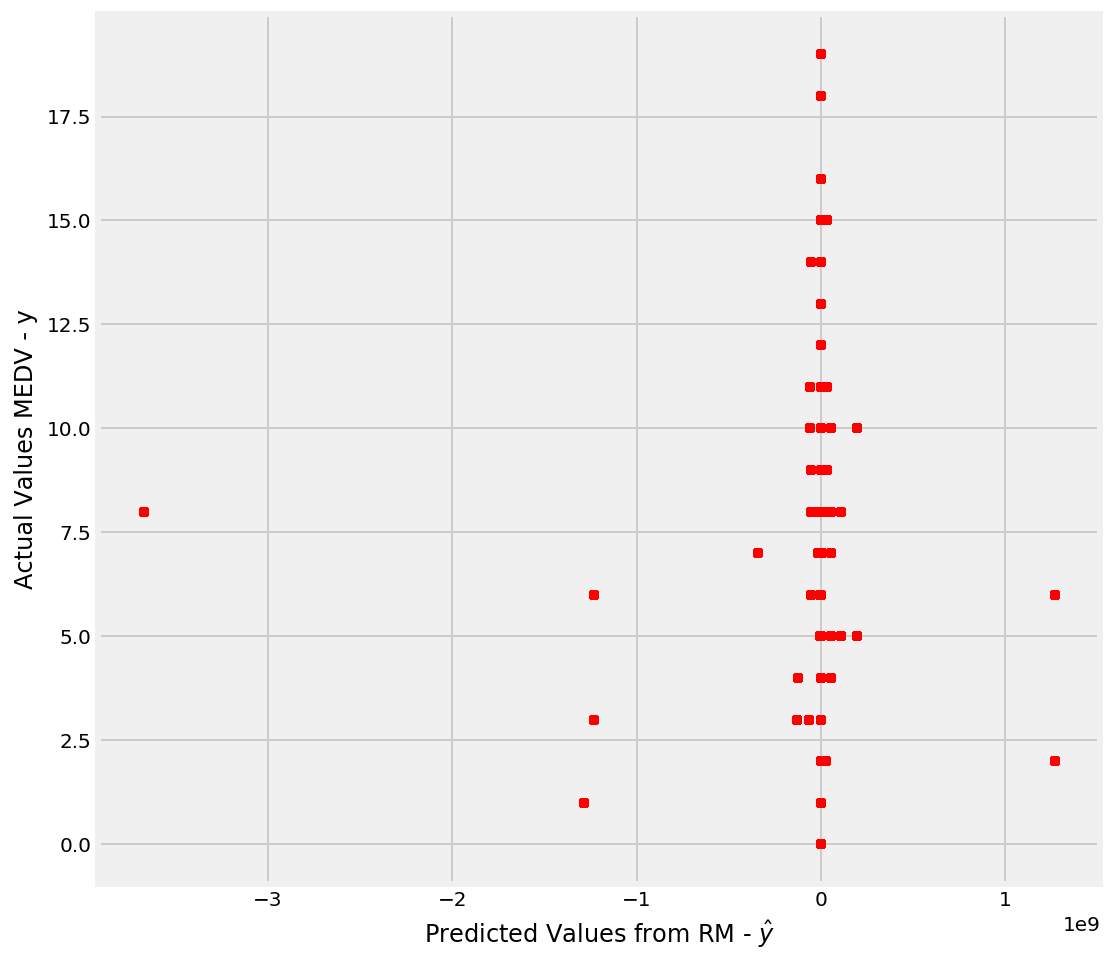

score:  0.841807321924


In [70]:
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

In [97]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
lr_r2_train = lr.score(X_train, y_train)
lr_r2_test = lr.score(X_test, y_test)

print "R2 on train: {}".format(lr_r2_train)
print "R2 on test: {}".format(lr_r2_test)

R2 on train: 0.831852969899
R2 on test: -1.27823687637e+14


In [99]:
### What's Causing randomness

# Too many predictor columns
# Categorical variables don't really matter
# Too few rows to the number of columns
# if have more than 1 column that is exactly the same as another, then won't be able to find the most accurate line

# <font color=blue> Interlude</font> - Slides

Sit back and enjoy the show...

----
# <font color=blue> Part II</font> - Addressing the problem

---

### 6. Try fitting ealuating a  `Ridge` model instead of a standard `LinearRegression`
The ridge regression is a model _similar_ to the standard linear regression, but for now let it remain shrouded in an \*air\* of mystery.

Is it better than the Linear regression? On the training set? On the test set? Why do you think that is?

In [121]:
ridge = Ridge(alpha = 1.0)

model2 = rd.fit(x_train, y_train)

print 'intercept:', rd.intercept_
print 'score:', rd.score

predictions2 = model2.predict(x_test)
score_train2 = model2.score(x_train, y_train)
score_test2 = model2.score(x_test, y_test)


score2 = model2.score(x_test,y_test)

print predictions2
print score2

intercept: 7.76073572028
score: <bound method Ridge.score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>
[  8.85360187   6.15029186   5.53849152   8.44654634   8.02331342
   9.20818034   5.39123539   5.54054128   9.26450444   9.64730943
   9.98700496   9.32773297   6.23812358   6.85841087   6.15410293
   8.01060581   6.01030651   7.03071488   8.42281952   7.52993321
   5.52718547   6.70055742   8.34838862   5.62518724   8.95646055
   8.07207507   7.06847854   5.19488505   9.11581266   6.92307118
   8.68078674   5.62274876   5.92447061   8.56842187   9.46695705
   7.28324446   8.33487616   7.00602421   7.52083227   7.71558553
   6.07131713   8.75226925   9.60835947   7.49889051   9.64617529
   8.43752808   6.65035754   7.85372552   7.64818392  11.03094373
   8.1316002    8.83497438   7.26755983   7.73048342  10.55085709
   5.08720201  11.71370627   6.60165189   7.62708866   5.58244613
   6.79473491   

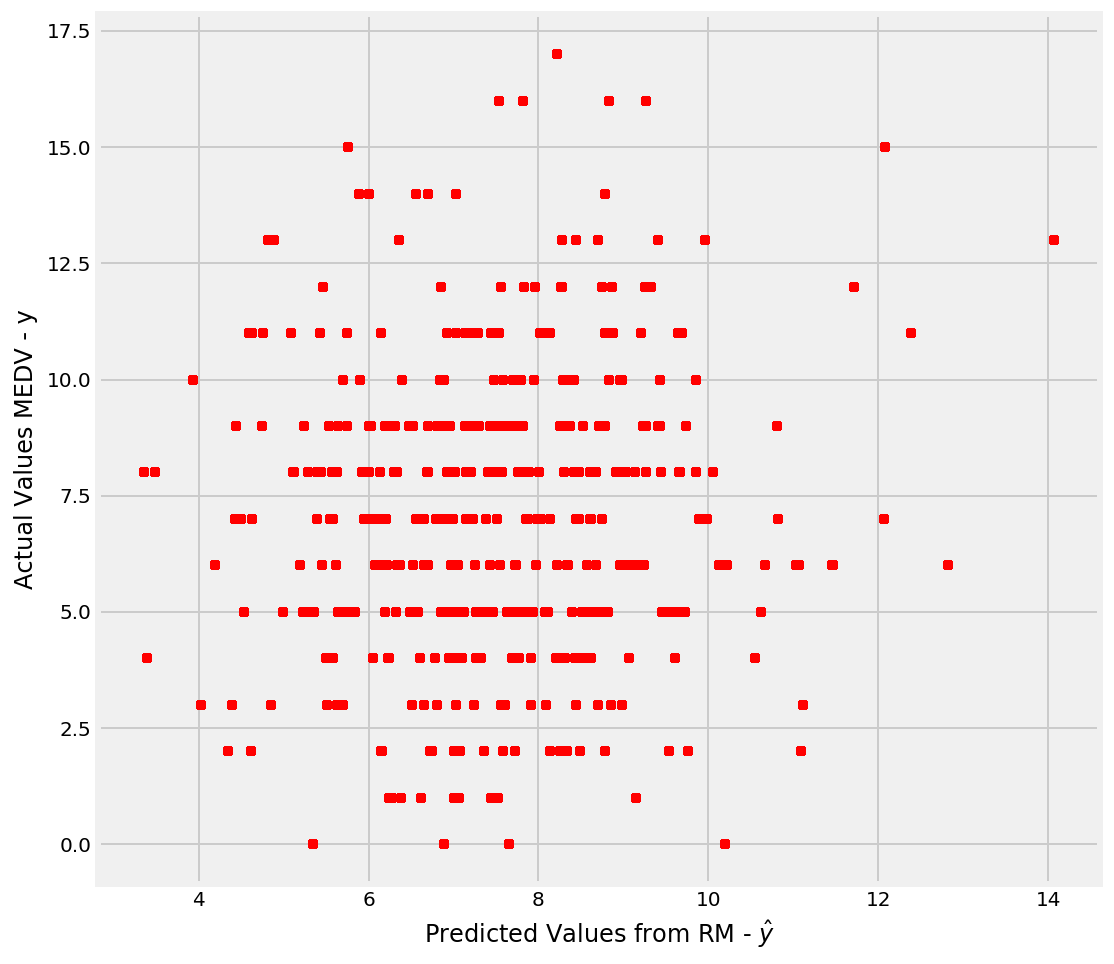

score:  -0.191420750174


In [122]:
plt.figure(figsize=(8,8))
plt.scatter(predictions2, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score2

(array([   1.,    0.,    0.,    0.,   28.,    3.,    1.,  497.,   32.,   82.]),
 array([ -1.72146177e+10,  -1.48993501e+10,  -1.25840826e+10,
         -1.02688151e+10,  -7.95354752e+09,  -5.63827998e+09,
         -3.32301244e+09,  -1.00774490e+09,   1.30752264e+09,
          3.62279018e+09,   5.93805772e+09]),
 <a list of 10 Patch objects>)

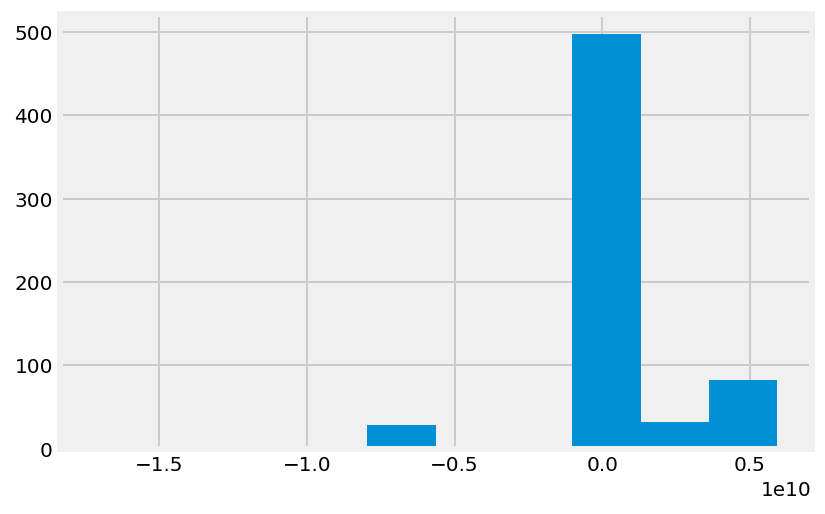

In [123]:
plt.hist(model.coef_)

(array([  10.,   26.,   63.,  136.,  213.,  102.,   65.,   17.,   10.,    2.]),
 array([-4.12747338, -3.1949979 , -2.26252241, -1.33004693, -0.39757144,
         0.53490404,  1.46737953,  2.39985501,  3.33233049,  4.26480598,
         5.19728146]),
 <a list of 10 Patch objects>)

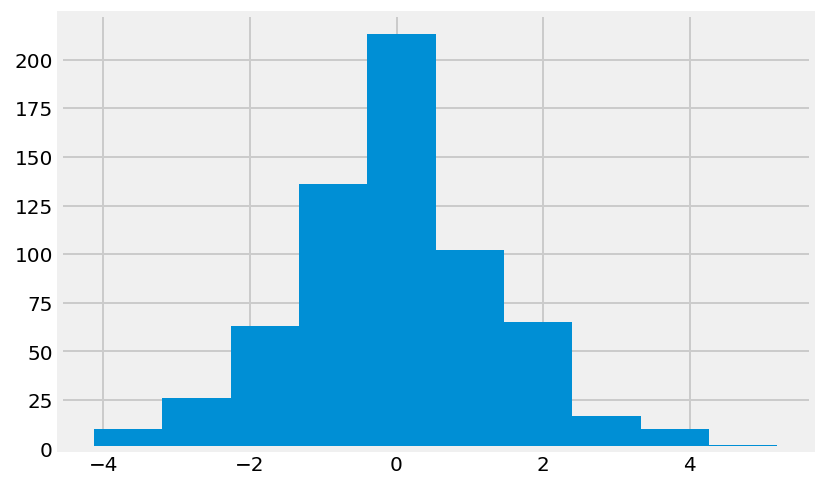

In [124]:
plt.hist(model2.coef_)

---
### 7. Examine your ridge model's coefficients

Does anything jump out at you? Use any the tools we've learned so far like histograms, barplots, and other descriptive statistics to compare the ridge model's fit to the linear regression we used earlier.


---

### 8. Play around with the `alpha` hyper parameter

How does this impact the coefficients of the fit model?

#### EX:
```python
ridge = Ridge(alpha = 10.0)
```

Some good values to try might be `0`, `0.1`, `1.0`, `10`, `100`

---

### 9. Fit a `Lasso` model and examine it's coefficients

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

- Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
- What percent of the variables in the original dataset are "zeroed-out" by the lasso?
- What are the most important predictors for how many shots Kobe made in a game?

In [142]:
lo = Lasso()

model3 = lo.fit(x_train, y_train)


predictions3 = model3.predict(x_test)
score_train3 = model3.score(x_train, y_train)
score_test3 = model3.score(x_test, y_test)


score3 = model3.score(x_test,y_test)

print predictions3
print score3

[ 7.22288934  7.53360916  7.26128405  7.39466095  7.73936959  7.49008569
  7.05171656  7.05155801  7.35890566  7.40064895  7.30961893  7.44775469
  7.6134944   7.04723948  6.8389837   6.9109026   6.61351835  7.17956032
  7.31988772  6.74009479  7.26580762  7.19496339  7.61175756  7.01325621
  7.3606948   7.62397766  7.07085712  7.08666966  7.66404834  6.9089489
  7.21263623  7.34361365  7.04572909  7.5518122   7.28286462  7.32682323
  7.64650783  7.32630055  7.33686065  7.12177792  7.55202333  7.59136175
  7.55917517  7.72268847  7.4535002   7.06240381  7.03293205  7.28901122
  7.44478861  7.39154826  7.65973383  7.29971169  7.67994429  7.1014673
  7.08023161  7.60138476  7.3972804   7.4812523   6.83801062  7.81454833
  7.11649969  7.6356813   7.10100005  6.88847673  6.84515425  7.83589242
  7.41077045  7.09844946  7.50209389  7.57812947  7.31380933  7.22853963
  7.57839518  7.16249622  7.36506995  7.3307717   7.49217072  7.19498579
  7.15970774  7.58857143  7.57414231  7.62204363  7.4

In [133]:
zip(model3.coef_, x_train)

[(0.0, 'AWAY_GAME'),
 (0.0, 'SEASON_OPPONENT:atl:1996-97'),
 (0.0, 'SEASON_OPPONENT:atl:1997-98'),
 (0.0, 'SEASON_OPPONENT:atl:1999-00'),
 (0.0, 'SEASON_OPPONENT:atl:2000-01'),
 (-0.0, 'SEASON_OPPONENT:atl:2001-02'),
 (0.0, 'SEASON_OPPONENT:atl:2002-03'),
 (-0.0, 'SEASON_OPPONENT:atl:2003-04'),
 (0.0, 'SEASON_OPPONENT:atl:2004-05'),
 (0.0, 'SEASON_OPPONENT:atl:2005-06'),
 (-0.0, 'SEASON_OPPONENT:atl:2006-07'),
 (0.0, 'SEASON_OPPONENT:atl:2007-08'),
 (-0.0, 'SEASON_OPPONENT:atl:2008-09'),
 (-0.0, 'SEASON_OPPONENT:atl:2009-10'),
 (-0.0, 'SEASON_OPPONENT:atl:2010-11'),
 (0.0, 'SEASON_OPPONENT:atl:2011-12'),
 (0.0, 'SEASON_OPPONENT:atl:2012-13'),
 (0.0, 'SEASON_OPPONENT:atl:2013-14'),
 (0.0, 'SEASON_OPPONENT:atl:2014-15'),
 (-0.0, 'SEASON_OPPONENT:atl:2015-16'),
 (0.0, 'SEASON_OPPONENT:bkn:2012-13'),
 (0.0, 'SEASON_OPPONENT:bkn:2015-16'),
 (0.0, 'SEASON_OPPONENT:bos:1996-97'),
 (-0.0, 'SEASON_OPPONENT:bos:1997-98'),
 (0.0, 'SEASON_OPPONENT:bos:1999-00'),
 (0.0, 'SEASON_OPPONENT:bos:2001-02

In [140]:
df_coef = pd.DataFrame(zip(model3.coef_, x_train))
df_coef.columns = ['coefficient', 'feature']
df_coef.sort_values('coefficient', ascending = False)

,coefficient,feature
552,0.004473,MEAN_X_POSITION
643,0.000104,CAREER_GAME_NUMBER
430,-0.000000,SEASON_OPPONENT:sac:2006-07
423,-0.000000,SEASON_OPPONENT:sac:1999-00
424,-0.000000,SEASON_OPPONENT:sac:2000-01
425,-0.000000,SEASON_OPPONENT:sac:2001-02
426,0.000000,SEASON_OPPONENT:sac:2002-03
427,-0.000000,SEASON_OPPONENT:sac:2003-04
428,0.000000,SEASON_OPPONENT:sac:2004-05
429,0.000000,SEASON_OPPONENT:sac:2005-06


---

### 10. Tune the alpha for your `Lasso` model

How does this influence the coefficients? The model performance on the train and the test sets?

In [9]:
# A:

---

### 11. Synthesize what you've discovered

Write a couple of sentences telling the story: 
- How did a standard linear regression perform on the Kobe dataset? What qualities of this dataset caused these results>
- How did a Ridge perform in comparison? What clues could you glean from its coefficients? How does `alpha` seem to dictate the coefficients?
- What about the the `Lasso`?
- When will be useful?

In [10]:
# A: